In [ ]:
#

In [1]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Enable graphical display
%matplotlib inline

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# Read the data
df = pd.read_csv('/content/drive/My Drive/UT-Austin-Python/Panda-Hub/foodhub_order.csv')
## Fill the blank to read the data
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


Observations:
The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [5]:
#How many rows and columns are present in the data?
# Check the shape of the dataset
df.shape

(1898, 9)

Observations: There are 1898 rows and 9 columns in the data. The rows account for all the orders processed¶


In [6]:
# dataframe.size
size = df.size

# printing size
print("Size = {}".format(size))

Size = 17082


Observation: Total dataframe size is 17082

In [7]:
#What are the datatypes of the different columns in the dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Observations: There are 1 float data type, 4 integers and 4 objects. The Rating column has the wrong data type. Order ID, and Customer ID are also categorical variables with numerical labels. We may want to amend them accordingly

In [8]:
#Are there any missing values in the data? If yes, treat them using an appropriate method.
# Checking for missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

Observations: There are no null items

In [10]:
#Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?
# Get the summary statistics of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


There are 1898 observations, 25% of the observations cost 12.08 or below, have no rating (rating zero as per the amendment done above), take about 23 minutes or below to prepare, and 20 minutes or below to deliver, 50% have values below 14.14, 4,27, and 25 for the cost, rating, preparation time, & delivery time respectively, for the 75% we have values below 22.29,5, 31, & 28 with the max observations being 35.41, 5, 35 and 33 for the same parameters.

Of these it takes a minimum of 20 minutes, an average of 27.37 minutes and a maximum of 35 minutes to prepare the food once the order is placed

In [11]:
#How many orders are not rated
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

Observations: 736 Not rated
Observations: Having converted the rating 'Not Given' value to zero, the count of zeros represent the same hence 736 orders were not rated.

In [12]:
# check unique order ID
df['order_id'].nunique()

1898

Observations:  There are 1898 unique orders

In [14]:
df['customer_id'].nunique()

1200

Observations: There are 1200 Unique Customers

In [15]:
# check unique Restaurant Name
df['restaurant_name'].nunique()

178

Observations: Thre are  178 Unique restaurants

In [16]:
# Check unique cuisine type
df['cuisine_type'].nunique()

14

Observations: There are 14 unique cusisine types

<Axes: xlabel='cuisine_type', ylabel='count'>

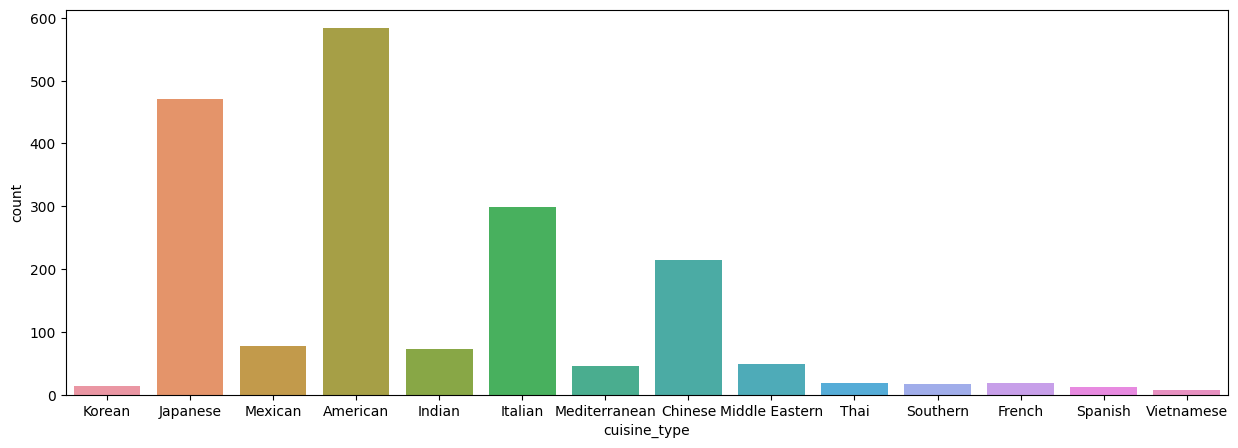

In [17]:
## Create a countplot fir cuise type
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')

Observations on Cuisine Type:
The most popular cuisines are American, Japanese,Italian,Chinese in that order, followed with a close tie between Mexican and Indian.

In [18]:
# # Check the unique values
df['day_of_the_week'].nunique()

2

Observations: Day of the weeks are divided into weekday and Weekened hence 2 unique values

<Axes: xlabel='day_of_the_week', ylabel='count'>

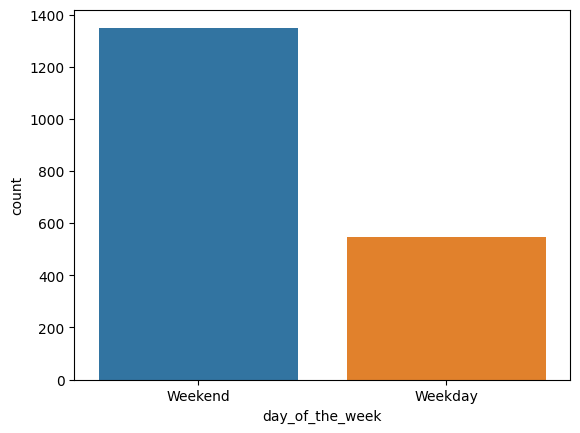

In [19]:
## Complete the code to plot a bar graph for 'day_of_the_week' column
sns.countplot(data = df, x = 'day_of_the_week')

Observations on Day of Week:
There is higher activity over the weekend than during the other weekdays.

In [20]:
# Check the unique values
# Check unique values for the 'rating' column
df['rating'].nunique()

4

Observation: There are 4 unique values.

<Axes: xlabel='rating', ylabel='count'>

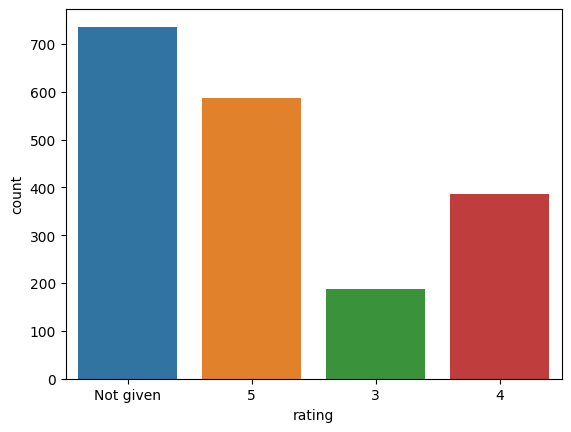

In [21]:
## Complete the code to plot bar graph for 'rating' column
sns.countplot(data = df, x = 'rating')

Observations:  More then 700 customers had not given any rating and no rating for 1 and 2. The highest number of ratings were 5 for around 590 customers.

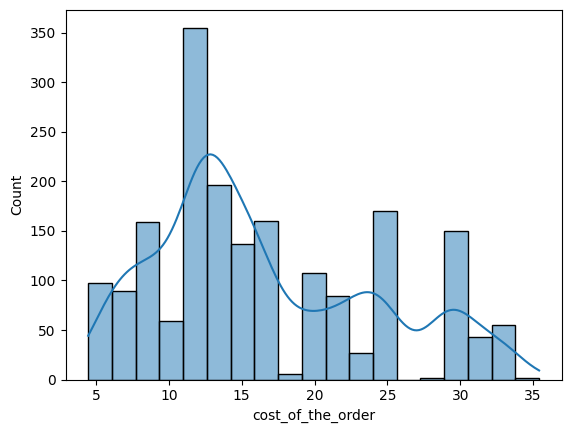

In [22]:
## Complete the code to plot the histogram for the cost of order
sns.histplot(data=df,x='cost_of_the_order',stat = 'count',kde = True)
plt.show()

Observations: Majority of the orders cost less then 24 USD and cost of the order is skewed to the right.  Lowest order cost is around $4.5 while highest order cost is around 35.5 USD

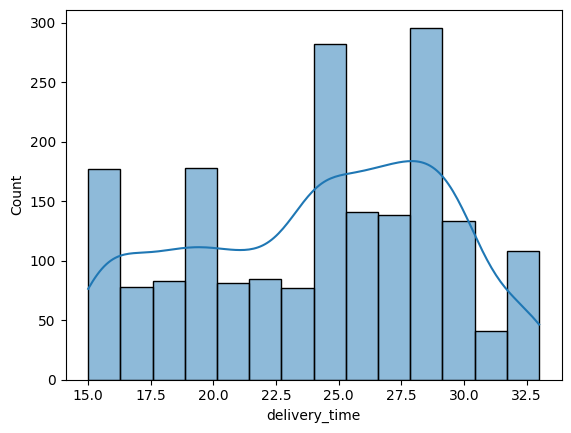

In [23]:
## Complete the code to plot the histogram for the delivery time
sns.histplot(data=df,x='delivery_time', stat = 'count',kde = True)
plt.show()

Observations: The range of the delivery time is between 15 and 32.5 minutes with majoirty orders delivered in 25-30 minutes. The distribution of the delivery time is left skewed.



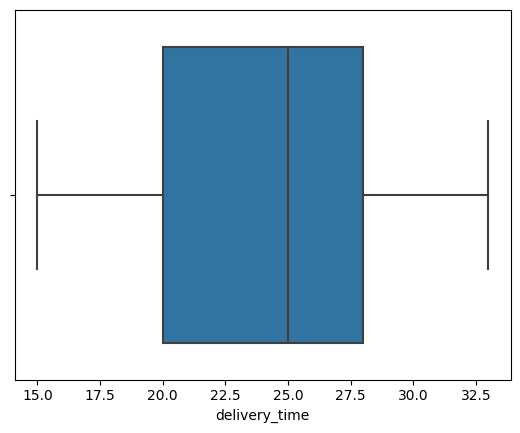

In [24]:
## Complete the code to plot the boxplot for the delivery time
sns.boxplot(data=df,x='delivery_time')
plt.show()

Observations: The mean delivery time is around 25 minutes and there are no outliers while delivery times skewed to left.

In [25]:
# Get top 5 restaurants with highest number of orders
df[['restaurant_name','order_id']].groupby('restaurant_name').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


Observations:   Shake Shack has the higest number of orders with 219 Orders

In [26]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts().head(3)

American    415
Japanese    335
Italian     207
Name: cuisine_type, dtype: int64

Observations: American is the most popular cuisine on teh weekend followed by Japanese and then Italian

In [27]:
# Get orders that cost above 20 dollars
# Calculate the number of total orders where the cost is above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20]
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

The number of total orders that cost above 20 dollars is: 555


Observations: 555 orders cost above 20 dollars

In [28]:
# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100
print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

Percentage of orders above 20 dollars: 29.24 %


Observations: 29.24% orders were above 20 dollars

In [29]:
# What is the mean order delivery time?
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()
print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


Observations: The Avg delivery time was around 24.16 minutes

In [30]:
# The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

Observations:  The top 3 customer with customer id are (from higest to lowest) 52832 plaed 13 orders, 47440 placed 10 orders and 83827 placed 9 ordrs

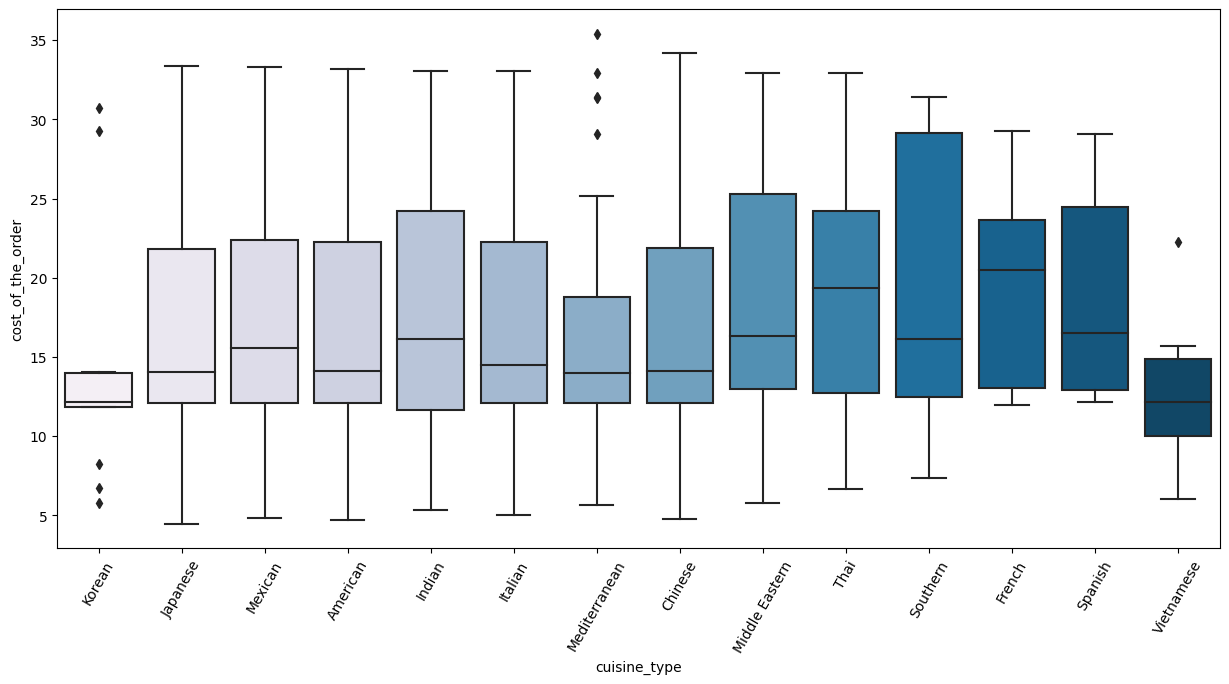

In [32]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

Observations: Most of the cusine have skewed costs and Korean, Vietnamese and Mediterranean having outliers

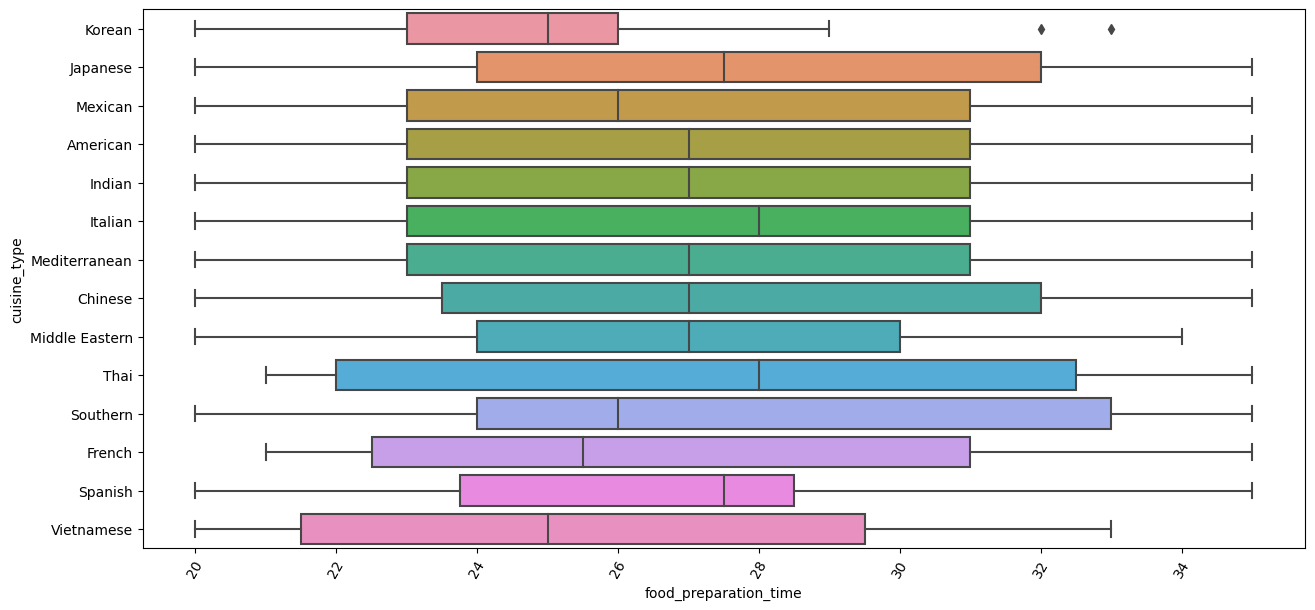

In [33]:
# Relationship between food preparation time and cuisine type
## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.figure(figsize=(15,7))
sns.boxplot(x='food_preparation_time', y='cuisine_type', data=df)
plt.xticks(rotation = 60)
plt.show()

Observations: Most of the cuisine have almost avg food preparation time with some having large spread.

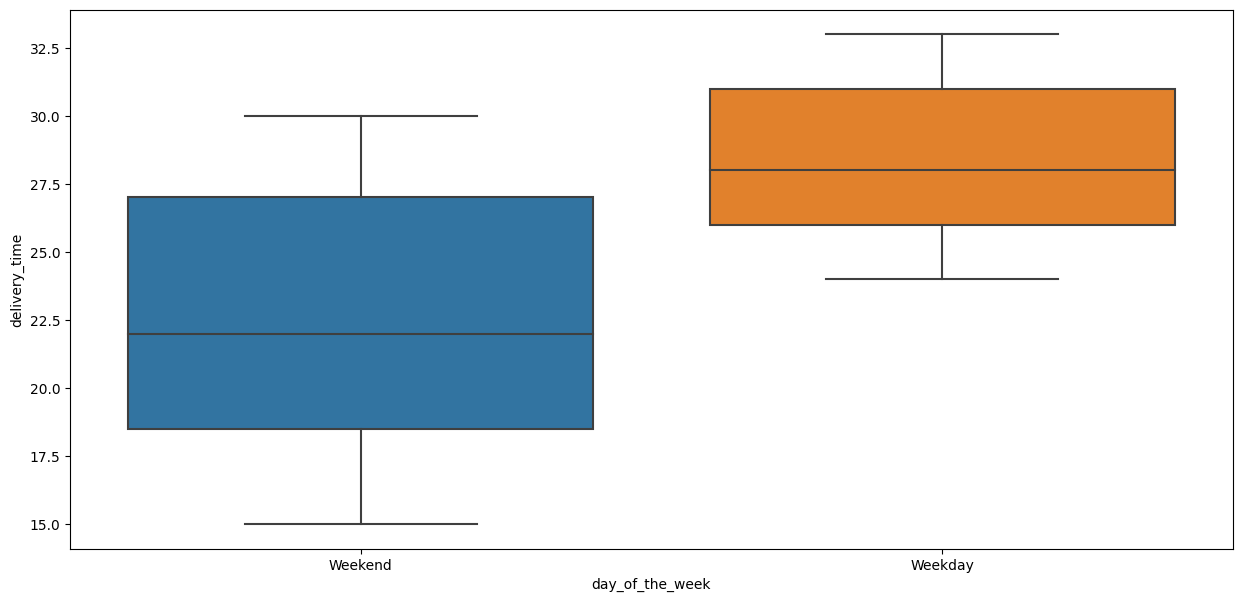

In [34]:
# Relationship between day of the week and delivery time
## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.show()

Observations:  A consistent delivery time spread is noticed b/w weekday and weekend....The median delivery time on weekend is around 21.5 while median delivery time on weekday is 28.5 a little higher then weekend.

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

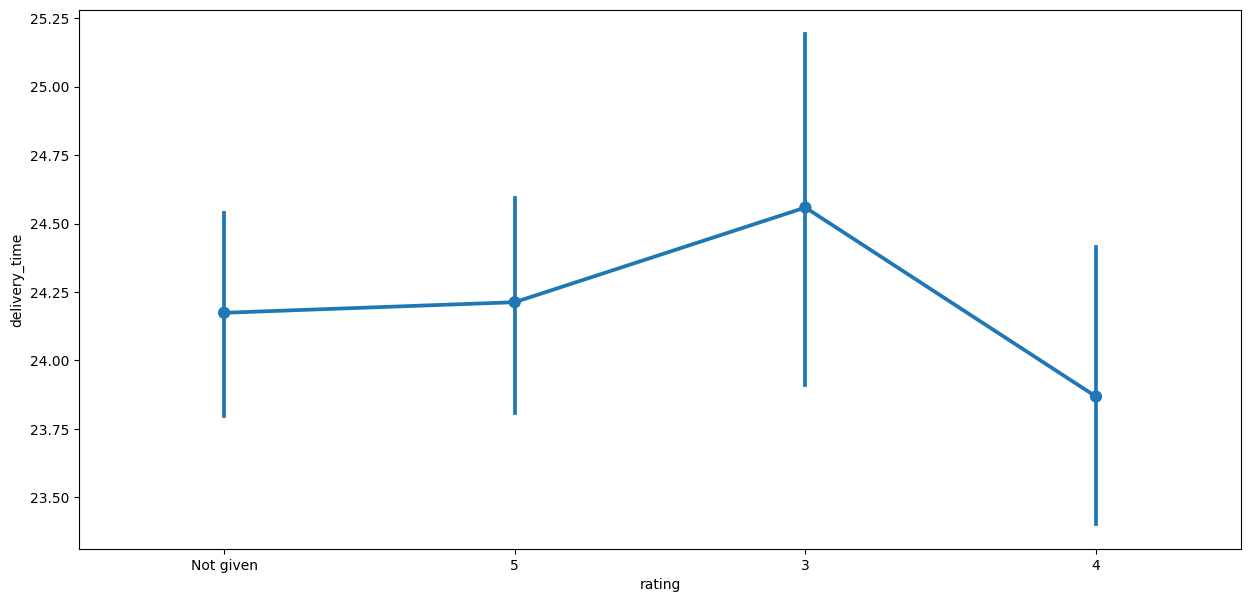

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

Observations:  The median delivery time 24.2  have no impact on ratings and customers gave 5 or not given..A higher delivery time had rating 3 while lowest delivery time was given 4 ratings. There is room for imrovement for delivery time which may increase in revenue for restaurants.

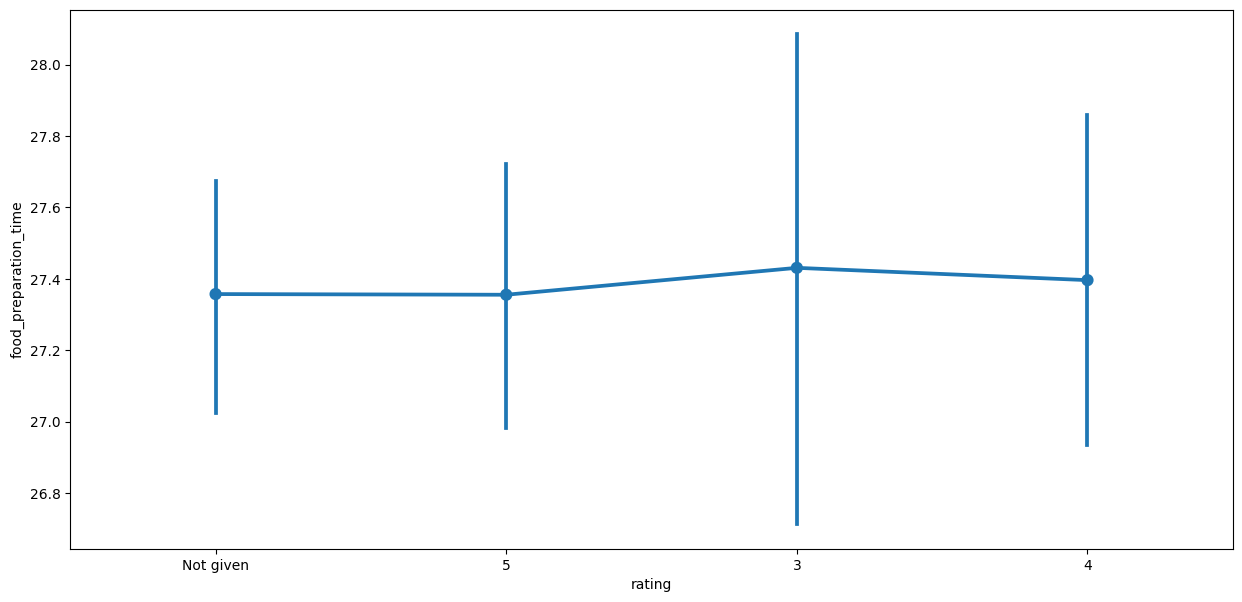

In [ ]:
from ctypes import DEFAULT_MODE
# Relationship between rating and food preparation time
## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='food_preparation_time', data=df)
plt.show()

Observations:  There is no significant impact between ratings and food prep time

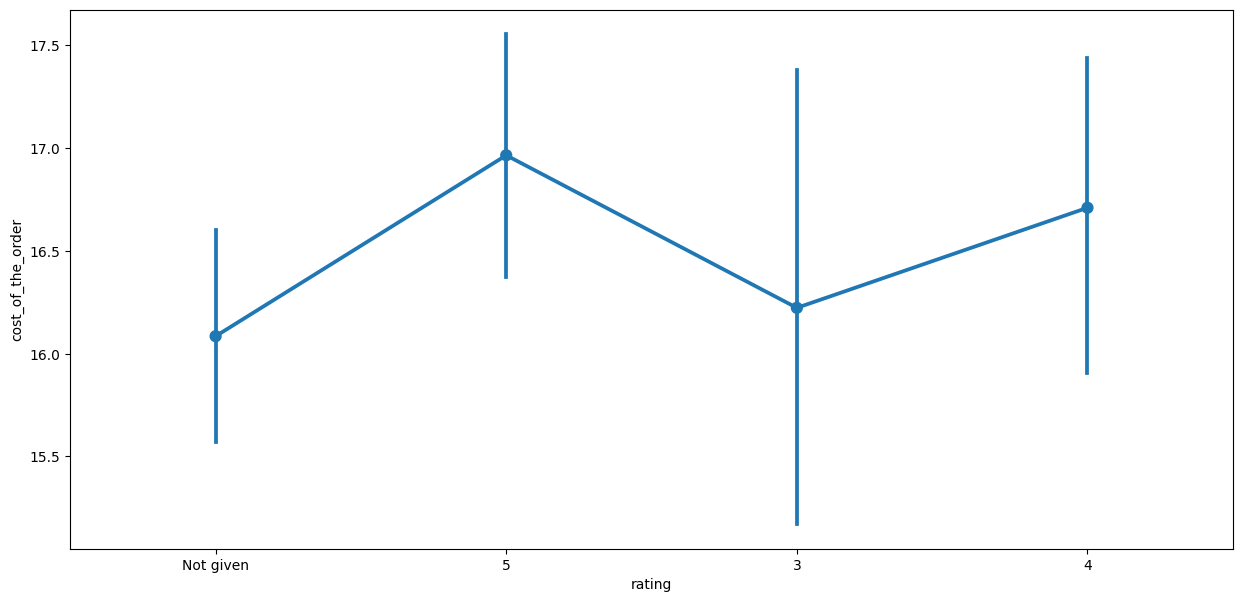

In [ ]:
# Relationship between rating and cost of the order
## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='cost_of_the_order', data=df)
plt.show()

Observations:  Highest ratings were given to orders cost of 16.7 or more and ratings not given with cost of the order 16.1 while rating 3 has the least confidence in rating

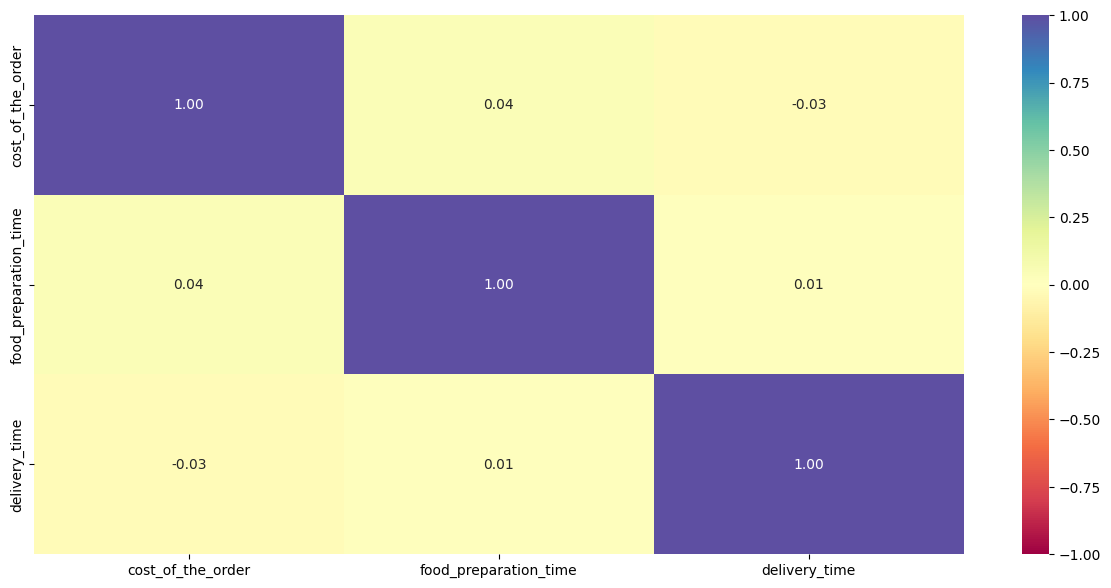

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations: Higher delivery time have no impact on food prep and cost of food. Actually delivery time, food prep and cost have no impacts.

In [ ]:
# The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that
# the restaurants must have a rating count of more than 50 and the average rating should be greater than 4.
# Find the restaurants fulfilling the criteria to get the promotional offer
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


Observations: Shake Shack, The Meatball Shop, Blue Ribbon sushi, Blue Ribbon fried chicken and RedFarm Broadway will all qualify for promotional offers and have ratings higher then 4.

In [ ]:
# Get the restaurant names that have rating count more than 50
## Complete the code to get the restaurant names having rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
## Complete the code to find the mean rating
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


Observations:  The Meatball shop, Blue Ribbon Fried Chicken, Shake Shack and Blue Ribbon Sushi all have rating count more then 50.

In [ ]:
# The company charges the restaurant 25% on the orders having cost greater than 20 dollars
# and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0
## Write the apprpriate column name to compute the revenue
df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# get the total revenue and print it
total_rev = df['Revenue'].sum()
## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


Observations: The net revenue on all orders is equal to $6166.30

In [ ]:
# The company wants to analyze the total time required to deliver the food.
# What percentage of orders take more than 60 minutes to get delivered from the time the order is placed
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)
df.head()
#
total_observations = df['total_time'].count()
ordertime_above60 = df['total_time'][df['total_time']> 60].count()
percent_above60 = round((ordertime_above60/total_observations)*100,2)
percent_above60






10.54

Observations:  There are 10.54 FoodHUb orders that exceed the delivery time of 60 minutes among all orders.

In [ ]:
# The company wants to analyze the delivery time of the orders on weekdays and weekends.
# How does the mean delivery time vary during weekdays and weekends
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it
print('The mean delivery time on weekends is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')


The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


Observations: The Avg delivery time on weekdays are greater then weekends. This can be due to traffic conditions and less drivers

In [4]:
!pip install nbconvert
#jupyter nbconvert --to html /content/drive/MyDrive/Colab Notebooks/Food-Hub.ipynb
#jupyter nbconvert /content/drive/MyDrive/Colab Notebooks/Food-Hub.ipynb --to html

In [5]:
!jupyter nbconvert --to html /content/Food-Hub-1.ipynb

[NbConvertApp] Converting notebook /content/Food-Hub-1.ipynb to html
[NbConvertApp] Writing 1155630 bytes to /content/Food-Hub-1.html
